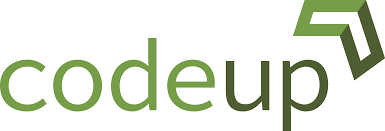

# <h><i><u><font size="20">Predicting Life Expectancy</font></u></i></h>
* by Justin Evans
    * GitHub: https://github.com/QMCBT-JustinEvans/project-4_Individual/blob/main/01_wrangle.ipynb
    * LinkedIn: www.linkedin.com/in/qmcbt
    * E-mail: Justin.Ellis.Evans@gmail.com

# Project Overview:
This is an individual project to demonstrate my ability to source and acquire data independently outside the classroom environment. This individual project is an opportunity for me to showcase my ability to plan and execute a project that follows the full Data Science pipeline from start to finish with a presentable deliverable that has meaning and value in its content. I have chosen to use data from the [World Health Organization (WHO)](https://www.who.int/) because it is trustworthy and contains global input that spans many years.

# Goals: 
* Locate, Acquire, and Prepare data from a reputable source 
* Explore, Model, and Evaluate to select a model that will outperform Baseline
* Provide valid and insightful Observations and Recommendations 

# Reproduction of this Data:
* This project can be reproduced by cloning my GitHub repository [here:](https://github.com/QMCBT-JustinEvans/project-4_Individual) https://github.com/QMCBT-JustinEvans/project-4_Individual or by simply downloading at a minimum, the below listed files into a local folder and running the Final_Project.ipynb
    * 04_Final_Project.ipynb
    * QMCBT_01_wrangle.py
    * QMCBT_02_explore.py
    * QMCBT_03_model.py
    * leam.csv
    
    
* The below files can be used to walk step by step through the Data Science Process used to create the 04_Final_Project.ipynb file.
    * 01_wrangle.ipynb
    * 02_explore.ipynb
    * 03_model.ipynb
    
    
* Data for this project was acquired from the [World Health Organization (WHO)](https://www.who.int/) using the the [Global Health Obsevatory (GHO)](https://www.who.int/data/gho) data webservice, [Athena](https://www.who.int/data/gho/info/athena-api-examples).
    * World Health Organization (WHO) - [https://www.who.int/](https://www.who.int/)
    * Global Health Obsevatory (GHO) - [https://www.who.int/data/gho](https://www.who.int/data/gho)
    * Athena data webservice - [https://www.who.int/data/gho/info/athena-api-examples](https://www.who.int/data/gho/info/athena-api-examples)

# Project Planning using the Data Science Process:

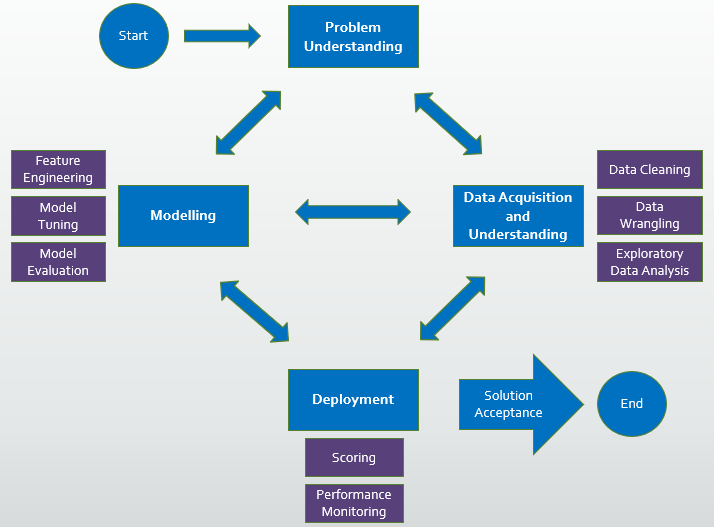

# Imports
* These are the imports required to run this notebook

In [1]:
# import helper files from local environment
import QMCBT_01_wrangle as w
import QMCBT_02_explore as e
import QMCBT_03_model as m

from sklearn.metrics import mean_squared_error

# Hides future deprecation warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# Acquire:    
### Life Expectancy & Mortality across the Globe
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000002,WHOSIS_000007,WHOSIS_000015?format=csv
    
<div class="alert alert-danger">

### Due to latency and timeout issues, the ```CSV Data Pull``` weblink above must be used to pull the CSV directly and save to a local file. Multiple refresh attempts may be required before getting the save file prompt.

In [3]:
# Read in csv from local file as leam_df (Life Expectancy And Mortality DataFrame)
leam_df = w.get_leam()

<div class="alert alert-success">

# Understand:
* Explore the data to get to know the elements and stats
* Create your Data Dictionary in this phase
* Identify your Prepare To-Do list in this phase
* Visualize your data in this phase

<div class="alert alert-success">

# Prepare
* Write the code to fix and clean the data

In [4]:
# Run custom function to clean data
leam_df = w.clean_leam(leam_df)

<div class="alert alert-info">

## Prepare Actions:
* **WHITESPACE:** None.
* **REFORMAT:** None.
* **CONVERT dtypes:** None.
* **FEATURE ENGINEER:** Create Target feature "life_expectancy" using mean of existing features. 
* **PIVOT:** Pivot Sex to use as binary categorical features. Pivot four WHOSIS features
* **REPLACE:** None.
* **RENAME:** None.    
* **REORDER:** None.   
* **CACHE:** Write cleaned DataFrame into a new csv file ('clean_leam.csv').  
* **ENCODE.map:** None.
* **MELT:** None.

<div class="alert alert-warning">

* **IMPUTE:** replaced NaN with "Global" for country where Region was identified as Global and Country was NaN
* **DROP Columns:** Dropped 6 Columns unecessary to data prediction (ie.. index and redundant features).
* **DROP Rows:** Dropped 480 observations containing NaN for less than 6% data loss.
* **Outliers:** Outliers were not disturbed

<div class="alert alert-success">

# Data Dictionary
* Documentation is hyperlinked

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|WHOSIS_000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65)|Life expectancy at birth (years)| 
|WHOSIS_000002|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)|Healthy life expectancy (HALE) at birth (years)| 
|WHOSIS_000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3443)|Healthy life expectancy (HALE) at age 60 (years)| 
|WHOSIS_000015|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2977)|Life expectancy at age 60 (years)| 
|YEAR         |    |The Year that the data was collected| 
|SEX_BTSX     |    |Both Sex; this is a combination of both Male and Female Gender (1=True and 0=False)|
|SEX_MLE      |    |Male Gender (1=True and 0=False)|
|SEX_FMLE     |    |Female Gender (1=True and 0=False)|
|life_expectancy|  |This feature is made from the mean of each of the WHOSIS features|

<div class="alert alert-warning">

# Split

In [5]:
# Split data
train, validate, test = w.split(leam_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2208, 10)

      Train: (1112, 10) - 50.0%
   Validate: (654, 10) - 30.0%
       Test: (442, 10) - 20.0%


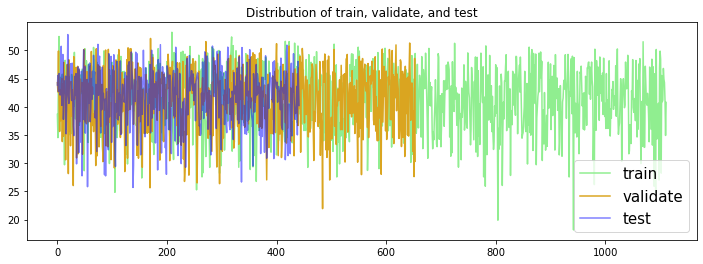

In [6]:
# Visualize data Split
w.viz_split(train, validate, test)

<div class="alert alert-warning">

# Scale
* Data was not scaled

<div class="alert alert-warning">

# Xy Split

In [7]:
# Assign Feture Columns and Target
feature_cols = ['YEAR','SEX_FMLE','SEX_BTSX',] 
target = 'life_expectancy'
# Xy split for train, validate, and test
X_train, y_train, X_val, y_val, X_test, y_test = w.Xy_split(feature_cols, target, train, validate, test)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:


   X_train: (1112, 3)   Index(['YEAR', 'SEX_FMLE', 'SEX_BTSX'], dtype='object')
   y_train: (1112,)     Index(life_expectancy)

X_validate: (654, 3)   Index(['YEAR', 'SEX_FMLE', 'SEX_BTSX'], dtype='object')
y_validate: (654,)     Index(life_expectancy)

    X_test: (442, 3)   Index(['YEAR', 'SEX_FMLE', 'SEX_BTSX'], dtype='object')
    y_test: (442,)     Index(life_expectancy)


## A brief look at the data:

In [8]:
# Preview DataFrame
train.head()

,YEAR,COUNTRY,WHOSIS_000001,WHOSIS_000002,WHOSIS_000007,WHOSIS_000015,life_expectancy,SEX_BTSX,SEX_FMLE,SEX_MLE
0,2019,MDG,66.59742,57.73955,12.94762,17.32550,38.652523,0,1,0
1,2015,MWI,59.67438,52.84434,10.92255,14.63438,34.518912,0,0,1
2,2019,CAN,80.39590,70.51000,18.20560,23.83582,48.236830,0,0,1
3,2019,KOR,86.08791,74.66070,21.20124,27.86740,52.454312,0,1,0
4,2015,NER,60.27560,53.83920,12.49067,16.16279,35.692065,0,0,1


<div class="alert alert-info">

## Summary of the data:

<div class="alert alert-success">

# Explore:
* Research the relationships in your data
* Ask Questions
* Form Hypothesis
* Visualize Data
* State Assumptions and Beliefs
* Perform Statistical Tests
* Report Findings and Observations

<div class="alert alert-warning">


# Q1
## Is there a relationship between Gender and life_expectancy?

## Visualization

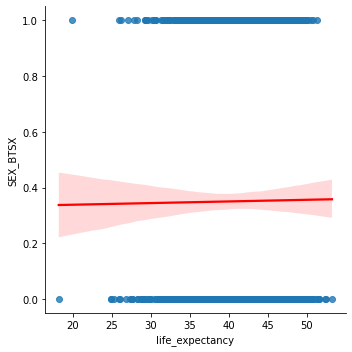

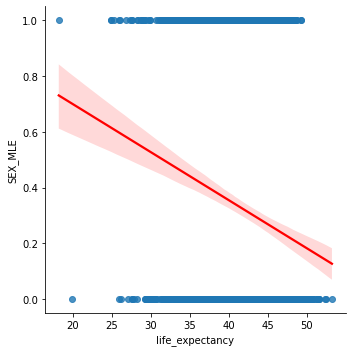

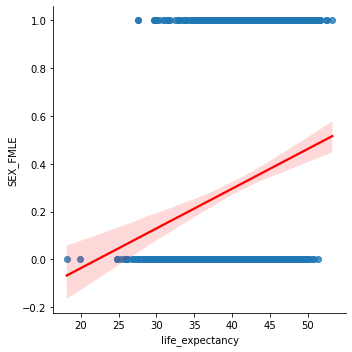

In [9]:
# Retrieve plot graph
e.viz_Q1(train)

<div class="alert alert-info">

    
#### Q1 Initial Observation:    
* It appears that each Gender category definitely has a relationship with our target.
    * Both Sex - slight upward trend
    * Male - Strong downward trend
    * Female - Strong upward trend

## Hypothesis

### Gender (Male, Female, Both)

* $H_{0}$: There is **NOT** a significant ```relationship``` between Gender and Life Expectancy**.   
* $H_{a}$: There **is** a significant ```relationship``` between Gender and Life Expectancy**.  


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Discreate (BTSX) vs Continuous (life_expectancy) = **T-Test**

## Test Hypothesis

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [10]:
# Perform T-Test
e.ttest(train, 'SEX_BTSX', 'life_expectancy', tail=2)

equal_var = False (Equal Variance cannot be assumed)
_______________________________________________________________
t-stat: -244.59654594013125
p-value: 0.0
_______________________________________________________________
Reject the null hypothesis


<div class="alert alert-info">
    
# Q1
    
### YES
### There **is** a significant ```relationship``` between Gender and Life Expectancy
    
    
### **There is evidence to support that Gender has a significant impact on average Life Expectancy.**  
    
* Based on this statistical finding I believe that Gender will be a determining feature in any machine learning efforts going forward.

<div class="alert alert-warning">


# Q2 
## Is the Life Expectancy of Females greater than the Life Expectancy of Males?

## Visualization

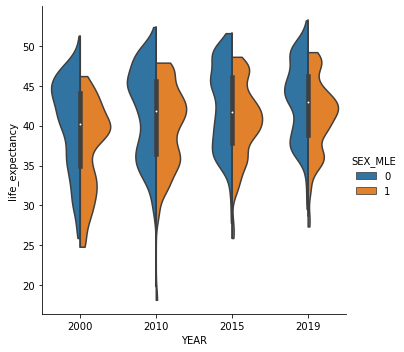

In [11]:
# Retrieve plot graph
e.viz_Q2(train)

<div class="alert alert-info">

    
#### Q2 Initial Observation:    
* It appears that although Males are trending upward in life expectancy year over year, they still have a lower life expectancy than non Males
* There also seems to be an alarming run of young deaths in 2010?

## Hypothesis

### Gender (Female)

* $H_{0}$: The life_expectancy of Females ```is less than``` the life_expectancy of Males**.    
* $H_{a}$: The life_expectancy of Females ```is greater than``` the life_expectancy of Males**. 


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* One_Tail, Two_Sample
* Discreat (Female) vs Continuous (Life Expectancy) = **T-Test**

## Test Hypothesis

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [12]:
# Perform T-Test
e.ttest(train, 'SEX_FMLE', 'life_expectancy', tail=2)

equal_var = False (Equal Variance cannot be assumed)
_______________________________________________________________
t-stat: -244.85287876004145
p-value: 0.0
_______________________________________________________________
Reject the null hypothesis


<div class="alert alert-info">
    
# Q2
    
## YES
The life_expectancy of Females **is** ```greater than``` the life_expectancy of Males
    

### **There is evidence to support that Female have a greater Life Expectancy than Males.**  
    
* Based on this statistical finding I believe that the Female Gender feature should be used in any machine learning efforts going forward.    

<div class="alert alert-warning">


# Q3
## Is there a relationship between ```Year``` and ```life_expectancy```?

## Visualization

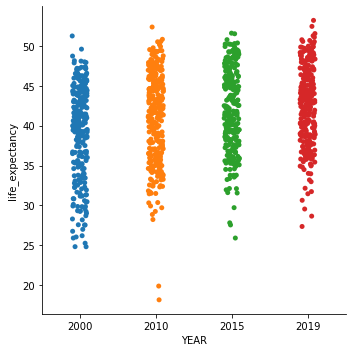

In [13]:
# Retrieve plot graph
e.viz_Q3(train)

<div class="alert alert-info">

    
#### Q3 Initial Observation:    
* It appears that there is a slight upward trend from year to year in Life Expectancy
* Again we can see a few outliers in 2010 but a much tighter grouping where the min starts

## Hypothesis

### Year

* $H_{0}$: There is **NOT** a significant ```relationship``` between the Year and Life Expectancy**.   
* $H_{a}$: There **is** a significant ```relationship``` between the Year and Life Expectancy**. 


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Discreate (YEAR) vs Continuous (life_expectancy) = **T-Test**

## Test Hypothesis

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [14]:
e.ttest(train, 'YEAR', 'life_expectancy', tail=2)

equal_var = False (Equal Variance cannot be assumed)
_______________________________________________________________
t-stat: 7335.918244735136
p-value: 0.0
_______________________________________________________________
Reject the null hypothesis


<div class="alert alert-info">
    
# Q3

### YES
### There **is** a significant ```relationship``` between the Year and Life Expectancy.
    
    
### **There is evidence to support that the Year has a significant impact on average Life Expectancy.**  

* Based on this statistical finding I believe that Year will be a determining feature in any machine learning efforts going forward.

<div class="alert alert-warning">


# Q4 
## Is there a relational difference between the four observable Years in our data?

## Visualization

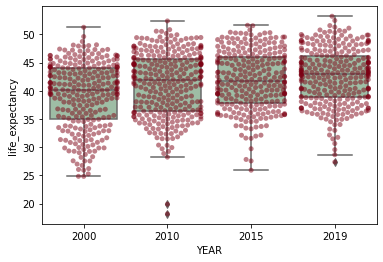

In [15]:
# Retrieve plot graph
e.viz_Q4(train)

<div class="alert alert-info">

    
#### Q4 Initial Observation:    
* It appears that there is a slight upward trend from year to year which would indicate that there is a Relational Difference between the years
* Again we can clearly see that 2010 has fewer clusters on the low end of life expectancy than the other years with the exception of a few outliers

## Hypothesis

### Year (2000, 2010, 2015, 2019)

* $H_{0}$: The average life_expectancy of each year is **NOT** ```significantly different``` than the other years**.   
* $H_{a}$: The average life_expectancy of each year is ```significantly different``` than the other years**. 


* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


* Two_Tail, Two_Sample
* Discreat (YEAR) vs Continuous (Life Expectancy) = **ANOVA**

## Test Hypothesis

<div class="alert alert-warning">

# ANOVA $latex y_i = b_0+b_1X_{1,i} +…+b_{j-1,i} + e_i&s=2$
* ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. 
* Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.
* The ratio obtained when doing this comparison is known as the F-ratio. 
* A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design.

    
* As for all parametric tests the data need to be normally distributed (each group’s data should be roughly normally distributed) for the F-statistic to be reliable. 
* Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.

#### Assumptions:
As with all parametric tests also ANOVA has a number of assumptions. 
1. First of all, the groups have to be independent of each other. 
2. Second, the data needs to be normally distributed (within each group). 
3. Third, there have to be equal variances between all groups. 

Homogeneity of variances can be tested with [Bartlett’s and Levene’s test](https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/) in Python (e.g., using SciPy) and the normality assumption can be tested using the Shapiro-Wilks test or by examining the distribution. Note, if your data is skewed you can transform it using e.g. the [log transformation](https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/) in Python.



In [16]:
# Run Anova Statistical Test
e.anova_test(train, 'YEAR', 'life_expectancy')

f_val: 53815696.49335445
p_val: 0.0
_______________________________________________________________
Reject the null hypothesis


<div class="alert alert-info">
    
# Q4
    
### YES
### The average Life Expectancy of each year **is** ```significantly different``` than the other years.
    
    
### **There is evidence to support that each Year is significantly different and will have an impact in determinng average Life Expectancy.**  
    
* Based on this statistical finding I believe that Year will be an integral feature and should be included in any machine learning efforts going forward.

<div class="alert alert-info">

## Exploration Summary of Findings:
* Gender seems to have an impact on life expectancy
* Both Male and Female life expectancies raise over the years
* In general year over year the life expectancy rate seems to maintain an upward trend
* Women have a higher life expectany than men


### Target = life_expectancy 
    
    
### Features to be used
* **SEX_FMLE:** Female
* **SEX_BTSX:** Both Sex
* **YEAR:** The Year that life expectancy data was recorded    
    
### Features that will not be used
* **SEX_MLE:** Redundant since we have Female and Both Sex
* **WHOSIS_000001, 02, 07, and 15 -** These created the Target so they cannot be used as they would be considered leakage

<div class="alert alert-success">

# Modeling
* Mean Squared Error (MSE) will be the evaluation metric. 
    * MSE helps to understand how well the model fits the data.

    
* Baseline will be set using mean:
    * Mean was chosen due to the normal distribution of our target
    * Baseline MSE = 30.377263

    
* The following models will be evaluated on train and validate:
    * simple_lm                    
    * polynomial only interaction   
    * polynomial degree 2           
    * multiple_rfe                   
    * lasso_lars 
    * glm tweedie
    
### The model that performs the best on validate data will be run with test data.

<div class="alert alert-warning">

## Comparing Models:
* Establish Baseline
* Evaluate on train and validate    
* Run proper evaluation tests on prediction results to get RMSE, SSE, etc for Comparison

RMSE using Mean
Train/In-Sample:  5.54 
Validate/Out-of-Sample:  5.51
___________________________________________________________________________________
RMSE using Median
Train/In-Sample:  5.56 
Validate/Out-of-Sample:  5.53


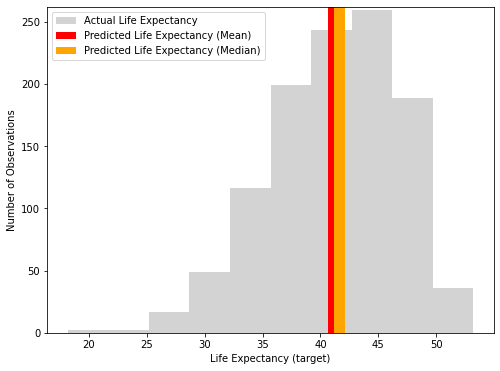

In [17]:
# Calculate Error
m.rmse_eval(y_train, y_val,)

In [18]:
# Read in prediction resultas
predictions = m.get_predictions()

# run function to calculate MSE
def calculate_mse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted)

# Apply function to prediction DataFrame
predictions.apply(calculate_mse).sort_values()

actual                              0.000000
simple_lm                          27.561285
polynomial only interaction        27.637088
polynomial degree 2                27.637654
multiple_rfe                       29.480014
lasso_lars                         30.377263
glm                                30.377263
baseline                           30.377263
Unnamed: 0                     117073.558206
dtype: float64

<div class="alert alert-info">

## Modeling Summary:
* All models did slightly better than baseline.
* None of the models were within acceptable proximity to actual target results

* Our top model ```Simple Linear Regression Model```  was run on test data and performed better than baseline as expected and even outperformed its previous score on validation by approximately three base points.

**For this itteration of modeling we have a model that beats baseline.**    

<div class="alert alert-success">



<B><center><font size='80'> Evaluate Best Model on ```Test``` </font></B></center> 
<B><center><font size='10'><i> $(Simple Linear Regression Model)$ ```simple_lm``` </i></font></B></center>


RMSE using Mean
Train/In-Sample:  5.57 
Validate/Out-of-Sample:  5.53 
TEST/Out-of-Sample:  5.27
___________________________________________________________________________________
RMSE using Median
Train/In-Sample:  5.67 
Validate/Out-of-Sample:  5.64 
TEST/Out-of-Sample:  5.31


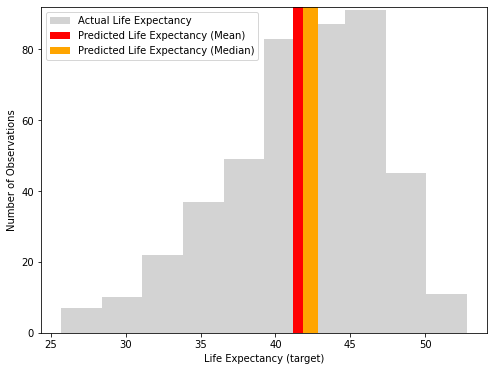

In [19]:
# Calculate Error
m.rmse_TEST_eval(y_train, y_val, y_test)

In [20]:
# Read in prediction resultas
metric_TEST = m.get_metric_TEST()

# run function to calculate MSE
def calculate_TEST_mse(y_predicted):
    return mean_squared_error(metric_TEST.actual, y_predicted)

# Apply function to prediction DataFrame
metric_TEST.apply(calculate_TEST_mse).sort_values()

actual                0.000000
simple_lm_TEST       24.127313
baseline             27.778390
Unnamed: 0        48341.010622
dtype: float64

<div class="alert alert-info">

# Conclusions: 
* **Exploration:** 
    * We asked 4 Questions using T-Test and Anova Statistical testing to afirm our hypothesis
    * In general year over year the life expectancy rate seems to maintain an upward trend
    * Women have a higher life expectany than men
* **Modeling:**
    * We trained and evaluated 6 different Linear Regression Models, all of which outperformed baseline 
    * We chose the Simple Linear Regression Model as our best performing model
    * When evaluated on Test, it continued to outperform baseline and surpased its previous performance on validate
* **Recommendations:**
    * I think we should hold off on deploying this model.
    * Even though it beat baseline, it came nowhere near actual.
    * We can acquire a much better dataset given more time
* **Next Steps:**
    * I would like to request more time to investigate the data available on the Athena data webservice managed by the World Health Organization.
    * I also came across some similar projects that I can reference to research their findings in comparison to my own.